## **Preposessing Dataset Training**

---

Dataset full_text berasal dari penelitian: [Emotion dataset from Indonesian public opinion](https://www.sciencedirect.com/science/article/pii/S2352340922006588?via%3Dihub)

Dataset                              : [link Dataset](https://github.com/Ricco48/Emotion-Dataset-from-Indonesian-Public-Opinion)

## Installing Package

In [119]:
! pip install sastrawi

## Import Library

In [120]:
import pandas as pd
import numpy
import collections
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
from nltk import tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

import warnings
warnings.filterwarnings("ignore")

from IPython.display import display, HTML

# Load Data Train

In [121]:
tovidio = pd.read_csv("../Dataset/Testing/Raw/(to-vidio).csv", on_bad_lines="skip", delimiter=",")
tovidio


,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1785006273387438334,Mon Apr 29 18:00:34 +0000 2024,0,@vidio kenapa match lavani vs PBS ga bisa diputar??? mau nonton ulang aksi Beik nih,1785006273387438334,NaN,vidio,in,"Di TanahAirku, Indonesia",0,1,0,https://twitter.com/Widya_skb/status/1785006273387438334,372755145,Widya_skb
1,1784987684961968170,Mon Apr 29 16:52:54 +0000 2024,0,@vidio ga mau ga ngasih solusi jg.. solusinya itu re-upload match Proliga nya @LavaniForever kemarin TITIK,1784989247428288792,NaN,vidio,in,JC (1) 😇,0,0,0,https://twitter.com/DefVl06/status/1784989247428288792,2449483950,DefVl06
2,1784942779476623424,Mon Apr 29 13:48:15 +0000 2024,0,@vidio nyiarin indo vs usbek gk??,1784942779476623424,NaN,vidio,in,"Denpasar, Jakarta",0,2,0,https://twitter.com/radityaputra_/status/1784942779476623424,86374232,radityaputra_
3,1784719150105219270,Mon Apr 29 10:51:29 +0000 2024,0,@vidio Kecewa banget udah berbayar tapi gak bisa nonton tim uber main,1784898292716810490,NaN,vidio,in,"Metro Barat, Indonesia",0,0,0,https://twitter.com/nungkiki/status/1784898292716810490,183950036,nungkiki
4,1784870266088063164,Mon Apr 29 09:59:34 +0000 2024,0,@vidio Ohhhh di court 4 ternyata ga ada kamera emang,1784885227808006416,NaN,vidio,in,NaN,0,0,0,https://twitter.com/PMskk15/status/1784885227808006416,1304725798050381824,PMskk15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,1775081451459129393,Tue Apr 02 08:45:47 +0000 2024,0,@vidio Responnya cepet banget makasih min,1775082187794378869,NaN,vidio,in,NaN,0,0,0,https://twitter.com/EMAGE07/status/1775082187794378869,1714440764342804480,EMAGE07
162,1775034376616886775,Tue Apr 02 05:35:48 +0000 2024,0,@vidio drama 49 days udah ga ada lagi atau gimana nih?,1775034376616886775,NaN,vidio,in,NaN,0,1,0,https://twitter.com/xxalmirangrhn/status/1775034376616886775,115819661,xxalmirangrhn
163,1774598356079382837,Mon Apr 01 01:10:46 +0000 2024,0,@vidio oh gitu.. oke deh min. makasih jawabannya,1774605291717562623,NaN,vidio,in,in your timeline,0,1,0,https://twitter.com/xjhpp/status/1774605291717562623,104410124,xjhpp
164,1774598356079382837,Mon Apr 01 01:00:38 +0000 2024,0,@vidio beberapa konten pilihan itu yg kae apa utk bisa langsung liat itu utk gold/platinum? soalnya kudu pencet play dulu baru ketauan itu konten ...,1774602738695098552,NaN,vidio,in,in your timeline,0,1,0,https://twitter.com/xjhpp/status/1774602738695098552,104410124,xjhpp


In [122]:
vidio1 = pd.read_csv("../Dataset/Testing/Raw/(@vidio).csv", on_bad_lines="skip", delimiter=",")
vidio1

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1785006273387438334,Mon Apr 29 18:41:37 +0000 2024,0,@Widya_skb Halo kak terkait kendala mu boleh infokan ke Dm mimin ya -MP,1785016605237502088,NaN,Widya_skb,in,Indonesia,0,0,0,https://twitter.com/vidio/status/1785016605237502088,2766004975,vidio
1,1785006273387438334,Mon Apr 29 18:00:34 +0000 2024,0,@vidio kenapa match lavani vs PBS ga bisa diputar??? mau nonton ulang aksi Beik nih,1785006273387438334,NaN,vidio,in,"Di TanahAirku, Indonesia",0,1,0,https://twitter.com/Widya_skb/status/1785006273387438334,372755145,Widya_skb
2,1784987684961968170,Mon Apr 29 16:52:54 +0000 2024,0,@vidio ga mau ga ngasih solusi jg.. solusinya itu re-upload match Proliga nya @LavaniForever kemarin TITIK,1784989247428288792,NaN,vidio,in,JC (1) 😇,0,0,0,https://twitter.com/DefVl06/status/1784989247428288792,2449483950,DefVl06
3,1784987684961968170,Mon Apr 29 16:49:24 +0000 2024,0,@DefVl06 Hai kak mohon maaf atas ketidaknyamanannya mohon infokan kendala lebih detailnya melalui DM agar bisa mimin cek yaa-AF,1784988366389580243,NaN,DefVl06,in,Indonesia,0,1,0,https://twitter.com/vidio/status/1784988366389580243,2766004975,vidio
4,1784987684961968170,Mon Apr 29 16:46:42 +0000 2024,0,lavani vs PBS itu diupload ulang match nya bisa ga? @vidio ga bisa diputar gw mau healing nonton itu malah ga bisa,1784987684961968170,NaN,NaN,in,JC (1) 😇,0,1,0,https://twitter.com/DefVl06/status/1784987684961968170,2449483950,DefVl06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,1783687608771719657,Fri Apr 26 02:42:11 +0000 2024,0,@justdebss Hai kak mohon maaf atas kendala yang dialami terkait pertandingan NBA Lakers vs Nuggets hari ini tidak tayang di Vidio terkait kebijaka...,1783687991996867020,NaN,justdebss,in,Indonesia,0,1,0,https://twitter.com/vidio/status/1783687991996867020,2766004975,vidio
246,1783685911651426517,Fri Apr 26 02:36:53 +0000 2024,0,@singgiihh Hi kak untuk pertandingan yang tayang di Vidio mengikuti kebijakan hak siar dari pihak NBA. Kakak bisa cek juga secara berkala di aplik...,1783686658254393796,NaN,singgiihh,in,Indonesia,0,0,0,https://twitter.com/vidio/status/1783686658254393796,2766004975,vidio
247,1783685911651426517,Fri Apr 26 02:33:55 +0000 2024,0,@vidio min! NBA lg playoff kok game nya dikit gak kayak taun lalu. Sekarang vidio apa2 paketnya bayar lebih terus loh,1783685911651426517,NaN,vidio,in,NaN,0,2,0,https://twitter.com/singgiihh/status/1783685911651426517,70894085,singgiihh
248,1783682192419483824,Fri Apr 26 02:20:45 +0000 2024,0,@morris_jeffri Hai kak mohon maaf untuk pertandingan Lakers vs Nuggets tidak tayang di Vidio terkait hak siar dari pihak NBA ya -HI,1783682600386916817,NaN,morris_jeffri,in,Indonesia,0,0,0,https://twitter.com/vidio/status/1783682600386916817,2766004975,vidio


In [123]:
vidio2 = pd.read_csv("../Dataset/Testing/Raw/(@Vidio) (1).csv", on_bad_lines="skip", delimiter=",")
vidio2

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1783480769782202651,Thu Apr 25 12:58:45 +0000 2024,0,@vidio ini sy knp ga bs ntn Liga 1 di laptop? biasanya bs cm di hp aja bs ny. pdhl paket diamond sy aktif nya otomatis https://t.co/HUgSHJEV6h,1783480769782202651,https://pbs.twimg.com/media/GMAyTHCbcAAwBPZ.jpg,vidio,in,"Bandung, Indonesia",0,1,0,https://twitter.com/imunk_7/status/1783480769782202651,323157800,imunk_7
1,1783480328499453965,Thu Apr 25 12:57:00 +0000 2024,0,MIN @vidio COBA BIKIN OPSI DISABLE KOMENTATOR DI APLIKASINYA NUNTUT JANGAN PAKE KOMENTATOR SI ITU GA DIDENGER TERUS,1783480328499453965,NaN,NaN,in,Bandung,0,0,0,https://twitter.com/wijatnaka_okky/status/1783480328499453965,192847689,wijatnaka_okky
2,1769031330036347005,Thu Apr 25 12:16:30 +0000 2024,0,@hey_Indahh Halo ka hari ini sudah tayang di Vidio ya ka -KA,1783470137724801126,NaN,hey_Indahh,in,Indonesia,0,0,0,https://twitter.com/vidio/status/1783470137724801126,2766004975,vidio
3,1769031330036347005,Thu Apr 25 12:13:59 +0000 2024,0,@volleyballidn @mojiupdates @vidio Proliga mulau tgl berapa min?,1783469503810298030,NaN,volleyballidn,in,Bekasi - Indonezie,0,1,0,https://twitter.com/hey_Indahh/status/1783469503810298030,1354035750,hey_Indahh
4,1783463124722762168,Thu Apr 25 11:51:49 +0000 2024,0,@fariqrafael_ Hai kak silahkan DM mimin mengenai detail kendala/pertanyaan kamu ya-RO,1783463926795325472,NaN,fariqrafael_,in,Indonesia,0,0,0,https://twitter.com/vidio/status/1783463926795325472,2766004975,vidio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,1776505181238370730,Sat Apr 06 07:00:15 +0000 2024,1,Lebaran enaknya nobar bareng orang tersayang! Mimin punya segudang tontonan Vidio Original Series GRATIS untuk kamu nobar di lebaran ini! Buruan k...,1776505181238370730,https://pbs.twimg.com/ext_tw_video_thumb/1776505127018631168/pu/img/Q1gSuSXyxDvLmJgn.jpg,NaN,in,Indonesia,0,0,0,https://twitter.com/vidio/status/1776505181238370730,2766004975,vidio
511,1776505168210927910,Sat Apr 06 07:00:12 +0000 2024,2,Kanaya (Ika Dihardjo) emang support system yang selalu ada buat Aliza ️ Coba tag Kanaya nya kalian &amp; ajakin mereka buat nonton #SantriPilihanB...,1776505168210927910,https://pbs.twimg.com/media/GKdp_p_bEAAm-AP.jpg,NaN,in,Indonesia,0,0,0,https://twitter.com/vidio/status/1776505168210927910,2766004975,vidio
512,1776503414152986660,Sat Apr 06 06:53:14 +0000 2024,3,Pintu Berkah SPECIAL RAMADHAN. Sore ini pkl 15.30 WIB. Saksikan selengkapnya hanya di Indosiar atau @vidio #Indosiar #PintuBerkah https://t.co/ysD...,1776503414152986660,https://pbs.twimg.com/amplify_video_thumb/1776503026108522496/img/jJg7z7fi0P-Kht9R.jpg,NaN,in,Indonesia,0,3,0,https://twitter.com/Indosiar/status/1776503414152986660,351999221,Indosiar
513,1776503305340096607,Sat Apr 06 06:52:48 +0000 2024,0,Kisah Nyata SPECIAL RAMADHAN. Sore ini pkl 13.30 WIB. Saksikan selengkapnya hanya di Indosiar atau @vidio #Indosiar #KisahNyata https://t.co/kIhgm...,1776503305340096607,https://pbs.twimg.com/amplify_video_thumb/1776503026095931392/img/3ZfnF1yowlswsYxW.jpg,NaN,in,Indonesia,0,2,0,https://twitter.com/Indosiar/status/1776503305340096607,351999221,Indosiar


In [124]:
tovidiosport = pd.read_csv("../Dataset/Testing/Raw/(to-VidioSport).csv", on_bad_lines="skip", delimiter=",")
tovidiosport

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username


In [125]:
vidiosport = pd.read_csv("../Dataset/Testing/Raw/(@VidioSport).csv", on_bad_lines="skip", delimiter=",")
vidiosport

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username


Gabungkan semua data menjadi satu dataframe.

In [126]:
train_data = pd.concat([tovidio,vidio1, vidio2, tovidiosport, vidiosport])
train_data.reset_index(inplace=True,drop=True)
train_data

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1785006273387438334,Mon Apr 29 18:00:34 +0000 2024,0,@vidio kenapa match lavani vs PBS ga bisa diputar??? mau nonton ulang aksi Beik nih,1785006273387438334,NaN,vidio,in,"Di TanahAirku, Indonesia",0,1,0,https://twitter.com/Widya_skb/status/1785006273387438334,372755145,Widya_skb
1,1784987684961968170,Mon Apr 29 16:52:54 +0000 2024,0,@vidio ga mau ga ngasih solusi jg.. solusinya itu re-upload match Proliga nya @LavaniForever kemarin TITIK,1784989247428288792,NaN,vidio,in,JC (1) 😇,0,0,0,https://twitter.com/DefVl06/status/1784989247428288792,2449483950,DefVl06
2,1784942779476623424,Mon Apr 29 13:48:15 +0000 2024,0,@vidio nyiarin indo vs usbek gk??,1784942779476623424,NaN,vidio,in,"Denpasar, Jakarta",0,2,0,https://twitter.com/radityaputra_/status/1784942779476623424,86374232,radityaputra_
3,1784719150105219270,Mon Apr 29 10:51:29 +0000 2024,0,@vidio Kecewa banget udah berbayar tapi gak bisa nonton tim uber main,1784898292716810490,NaN,vidio,in,"Metro Barat, Indonesia",0,0,0,https://twitter.com/nungkiki/status/1784898292716810490,183950036,nungkiki
4,1784870266088063164,Mon Apr 29 09:59:34 +0000 2024,0,@vidio Ohhhh di court 4 ternyata ga ada kamera emang,1784885227808006416,NaN,vidio,in,NaN,0,0,0,https://twitter.com/PMskk15/status/1784885227808006416,1304725798050381824,PMskk15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,1776505181238370730,Sat Apr 06 07:00:15 +0000 2024,1,Lebaran enaknya nobar bareng orang tersayang! Mimin punya segudang tontonan Vidio Original Series GRATIS untuk kamu nobar di lebaran ini! Buruan k...,1776505181238370730,https://pbs.twimg.com/ext_tw_video_thumb/1776505127018631168/pu/img/Q1gSuSXyxDvLmJgn.jpg,NaN,in,Indonesia,0,0,0,https://twitter.com/vidio/status/1776505181238370730,2766004975,vidio
927,1776505168210927910,Sat Apr 06 07:00:12 +0000 2024,2,Kanaya (Ika Dihardjo) emang support system yang selalu ada buat Aliza ️ Coba tag Kanaya nya kalian &amp; ajakin mereka buat nonton #SantriPilihanB...,1776505168210927910,https://pbs.twimg.com/media/GKdp_p_bEAAm-AP.jpg,NaN,in,Indonesia,0,0,0,https://twitter.com/vidio/status/1776505168210927910,2766004975,vidio
928,1776503414152986660,Sat Apr 06 06:53:14 +0000 2024,3,Pintu Berkah SPECIAL RAMADHAN. Sore ini pkl 15.30 WIB. Saksikan selengkapnya hanya di Indosiar atau @vidio #Indosiar #PintuBerkah https://t.co/ysD...,1776503414152986660,https://pbs.twimg.com/amplify_video_thumb/1776503026108522496/img/jJg7z7fi0P-Kht9R.jpg,NaN,in,Indonesia,0,3,0,https://twitter.com/Indosiar/status/1776503414152986660,351999221,Indosiar
929,1776503305340096607,Sat Apr 06 06:52:48 +0000 2024,0,Kisah Nyata SPECIAL RAMADHAN. Sore ini pkl 13.30 WIB. Saksikan selengkapnya hanya di Indosiar atau @vidio #Indosiar #KisahNyata https://t.co/kIhgm...,1776503305340096607,https://pbs.twimg.com/amplify_video_thumb/1776503026095931392/img/3ZfnF1yowlswsYxW.jpg,NaN,in,Indonesia,0,2,0,https://twitter.com/Indosiar/status/1776503305340096607,351999221,Indosiar


In [127]:
train_data.to_csv('../Dataset/Testing/not_preposessing.csv')

# EDA

Sebelum melakukan preprossing pada data, akan dilakukan eda secara singkat untuk melihat tipe data dan null values pada data.

In [128]:
eda_data = train_data.copy()

## Null Values

In [129]:
print("Null Values:")
eda_data.isna().sum()

Null Values:


conversation_id_str          0
created_at                   0
favorite_count               0
full_text                    0
id_str                       0
image_url                  711
in_reply_to_screen_name    216
lang                         0
location                   265
quote_count                  0
reply_count                  0
retweet_count                0
tweet_url                    0
user_id_str                  0
username                     0
dtype: int64

## Data Types

In [130]:
print("Data Types:")
eda_data.info()

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931 entries, 0 to 930
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      931 non-null    object
 1   created_at               931 non-null    object
 2   favorite_count           931 non-null    object
 3   full_text                931 non-null    object
 4   id_str                   931 non-null    object
 5   image_url                220 non-null    object
 6   in_reply_to_screen_name  715 non-null    object
 7   lang                     931 non-null    object
 8   location                 666 non-null    object
 9   quote_count              931 non-null    object
 10  reply_count              931 non-null    object
 11  retweet_count            931 non-null    object
 12  tweet_url                931 non-null    object
 13  user_id_str              931 non-null    object
 14  username                 931 n

In [131]:
eda_data.head()


,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1785006273387438334,Mon Apr 29 18:00:34 +0000 2024,0,@vidio kenapa match lavani vs PBS ga bisa diputar??? mau nonton ulang aksi Beik nih,1785006273387438334,NaN,vidio,in,"Di TanahAirku, Indonesia",0,1,0,https://twitter.com/Widya_skb/status/1785006273387438334,372755145,Widya_skb
1,1784987684961968170,Mon Apr 29 16:52:54 +0000 2024,0,@vidio ga mau ga ngasih solusi jg.. solusinya itu re-upload match Proliga nya @LavaniForever kemarin TITIK,1784989247428288792,NaN,vidio,in,JC (1) 😇,0,0,0,https://twitter.com/DefVl06/status/1784989247428288792,2449483950,DefVl06
2,1784942779476623424,Mon Apr 29 13:48:15 +0000 2024,0,@vidio nyiarin indo vs usbek gk??,1784942779476623424,NaN,vidio,in,"Denpasar, Jakarta",0,2,0,https://twitter.com/radityaputra_/status/1784942779476623424,86374232,radityaputra_
3,1784719150105219270,Mon Apr 29 10:51:29 +0000 2024,0,@vidio Kecewa banget udah berbayar tapi gak bisa nonton tim uber main,1784898292716810490,NaN,vidio,in,"Metro Barat, Indonesia",0,0,0,https://twitter.com/nungkiki/status/1784898292716810490,183950036,nungkiki
4,1784870266088063164,Mon Apr 29 09:59:34 +0000 2024,0,@vidio Ohhhh di court 4 ternyata ga ada kamera emang,1784885227808006416,NaN,vidio,in,NaN,0,0,0,https://twitter.com/PMskk15/status/1784885227808006416,1304725798050381824,PMskk15


## Data Distribution

In [132]:
eda_data['Length'] = eda_data['full_text'].str.len()
eda_data.head(10)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,Length
0,1785006273387438334,Mon Apr 29 18:00:34 +0000 2024,0,@vidio kenapa match lavani vs PBS ga bisa diputar??? mau nonton ulang aksi Beik nih,1785006273387438334,NaN,vidio,in,"Di TanahAirku, Indonesia",0,1,0,https://twitter.com/Widya_skb/status/1785006273387438334,372755145,Widya_skb,83
1,1784987684961968170,Mon Apr 29 16:52:54 +0000 2024,0,@vidio ga mau ga ngasih solusi jg.. solusinya itu re-upload match Proliga nya @LavaniForever kemarin TITIK,1784989247428288792,NaN,vidio,in,JC (1) 😇,0,0,0,https://twitter.com/DefVl06/status/1784989247428288792,2449483950,DefVl06,106
2,1784942779476623424,Mon Apr 29 13:48:15 +0000 2024,0,@vidio nyiarin indo vs usbek gk??,1784942779476623424,NaN,vidio,in,"Denpasar, Jakarta",0,2,0,https://twitter.com/radityaputra_/status/1784942779476623424,86374232,radityaputra_,33
3,1784719150105219270,Mon Apr 29 10:51:29 +0000 2024,0,@vidio Kecewa banget udah berbayar tapi gak bisa nonton tim uber main,1784898292716810490,NaN,vidio,in,"Metro Barat, Indonesia",0,0,0,https://twitter.com/nungkiki/status/1784898292716810490,183950036,nungkiki,70
4,1784870266088063164,Mon Apr 29 09:59:34 +0000 2024,0,@vidio Ohhhh di court 4 ternyata ga ada kamera emang,1784885227808006416,NaN,vidio,in,NaN,0,0,0,https://twitter.com/PMskk15/status/1784885227808006416,1304725798050381824,PMskk15,52
5,1784881335057707047,Mon Apr 29 09:53:47 +0000 2024,0,@vidio Lah tau gitu mending saya langganan SPOTV aja‍️ Ini sampai final emang ga akan ditayangin apa gimana?,1784883772556513447,NaN,vidio,in,"ÜT: -6.321956,106.837037",0,1,0,https://twitter.com/sittaazra/status/1784883772556513447,82071507,sittaazra,108
6,1784882676941377563,Mon Apr 29 09:51:13 +0000 2024,0,@vidio udah min mohon dicek,1784883126604374476,NaN,vidio,in,Bekasi,0,1,0,https://twitter.com/wan_iwann8/status/1784883126604374476,1280548072422928389,wan_iwann8,28
7,1784871664796209609,Mon Apr 29 09:05:40 +0000 2024,0,@vidio saya udah langganan kenapa mau nonton gak bisa ya https://t.co/bFnHUcMLbh,1784871664796209609,https://pbs.twimg.com/media/GMUjUQ0W0AA0ZNj.jpg,vidio,in,NaN,0,1,0,https://twitter.com/day_thatsme/status/1784871664796209609,1631949440469860352,day_thatsme,80
8,1784809866584109474,Mon Apr 29 05:49:13 +0000 2024,0,@vidio Endingnya kayak Bourne Ultimatum,1784822225365073922,NaN,vidio,in,NaN,0,0,0,https://twitter.com/dn_fadillah/status/1784822225365073922,2518021026,dn_fadillah,39
9,1784815112899133644,Mon Apr 29 05:20:57 +0000 2024,0,@vidio min voli lavani vs sumsel babel gak bisa di tonton ulang yg tgl 28 kemarin,1784815112899133644,NaN,vidio,in,"Kalimantan Tengah, Indonesia",0,1,0,https://twitter.com/Dianrahmad_MD/status/1784815112899133644,84026779,Dianrahmad_MD,81


In [133]:
print(f"Rata-rata panjang karakter full_text : {eda_data['Length'].mean():.2f}")

Rata-rata panjang karakter full_text : 104.80


In [134]:
print(f"Jumlah panjang karakter full_text  : {eda_data['Length'].sum():.2f}")

Jumlah panjang karakter full_text  : 97568.00


In [135]:
def word_count(full_text):
    full_text_list = full_text.split()
    return len(full_text_list)

In [136]:
eda_data['Word_count'] = eda_data['full_text'].apply(word_count)
eda_data.head(10)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,Length,Word_count
0,1785006273387438334,Mon Apr 29 18:00:34 +0000 2024,0,@vidio kenapa match lavani vs PBS ga bisa diputar??? mau nonton ulang aksi Beik nih,1785006273387438334,NaN,vidio,in,"Di TanahAirku, Indonesia",0,1,0,https://twitter.com/Widya_skb/status/1785006273387438334,372755145,Widya_skb,83,15
1,1784987684961968170,Mon Apr 29 16:52:54 +0000 2024,0,@vidio ga mau ga ngasih solusi jg.. solusinya itu re-upload match Proliga nya @LavaniForever kemarin TITIK,1784989247428288792,NaN,vidio,in,JC (1) 😇,0,0,0,https://twitter.com/DefVl06/status/1784989247428288792,2449483950,DefVl06,106,16
2,1784942779476623424,Mon Apr 29 13:48:15 +0000 2024,0,@vidio nyiarin indo vs usbek gk??,1784942779476623424,NaN,vidio,in,"Denpasar, Jakarta",0,2,0,https://twitter.com/radityaputra_/status/1784942779476623424,86374232,radityaputra_,33,6
3,1784719150105219270,Mon Apr 29 10:51:29 +0000 2024,0,@vidio Kecewa banget udah berbayar tapi gak bisa nonton tim uber main,1784898292716810490,NaN,vidio,in,"Metro Barat, Indonesia",0,0,0,https://twitter.com/nungkiki/status/1784898292716810490,183950036,nungkiki,70,12
4,1784870266088063164,Mon Apr 29 09:59:34 +0000 2024,0,@vidio Ohhhh di court 4 ternyata ga ada kamera emang,1784885227808006416,NaN,vidio,in,NaN,0,0,0,https://twitter.com/PMskk15/status/1784885227808006416,1304725798050381824,PMskk15,52,10
5,1784881335057707047,Mon Apr 29 09:53:47 +0000 2024,0,@vidio Lah tau gitu mending saya langganan SPOTV aja‍️ Ini sampai final emang ga akan ditayangin apa gimana?,1784883772556513447,NaN,vidio,in,"ÜT: -6.321956,106.837037",0,1,0,https://twitter.com/sittaazra/status/1784883772556513447,82071507,sittaazra,108,18
6,1784882676941377563,Mon Apr 29 09:51:13 +0000 2024,0,@vidio udah min mohon dicek,1784883126604374476,NaN,vidio,in,Bekasi,0,1,0,https://twitter.com/wan_iwann8/status/1784883126604374476,1280548072422928389,wan_iwann8,28,5
7,1784871664796209609,Mon Apr 29 09:05:40 +0000 2024,0,@vidio saya udah langganan kenapa mau nonton gak bisa ya https://t.co/bFnHUcMLbh,1784871664796209609,https://pbs.twimg.com/media/GMUjUQ0W0AA0ZNj.jpg,vidio,in,NaN,0,1,0,https://twitter.com/day_thatsme/status/1784871664796209609,1631949440469860352,day_thatsme,80,11
8,1784809866584109474,Mon Apr 29 05:49:13 +0000 2024,0,@vidio Endingnya kayak Bourne Ultimatum,1784822225365073922,NaN,vidio,in,NaN,0,0,0,https://twitter.com/dn_fadillah/status/1784822225365073922,2518021026,dn_fadillah,39,5
9,1784815112899133644,Mon Apr 29 05:20:57 +0000 2024,0,@vidio min voli lavani vs sumsel babel gak bisa di tonton ulang yg tgl 28 kemarin,1784815112899133644,NaN,vidio,in,"Kalimantan Tengah, Indonesia",0,1,0,https://twitter.com/Dianrahmad_MD/status/1784815112899133644,84026779,Dianrahmad_MD,81,16


In [137]:
print(f"Jumlah kata : {eda_data['Word_count'].sum():.2f}")

Jumlah kata : 14356.00


In [138]:
print(f"Rata-rata jumlah kata : {eda_data['Word_count'].mean():.2f}")

Rata-rata jumlah kata : 15.42


In [139]:
eda_data['mean_word_length'] = eda_data['full_text'].map(lambda rev: numpy.mean([len(word) for word in rev.split()]))
eda_data.head(10)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,Length,Word_count,mean_word_length
0,1785006273387438334,Mon Apr 29 18:00:34 +0000 2024,0,@vidio kenapa match lavani vs PBS ga bisa diputar??? mau nonton ulang aksi Beik nih,1785006273387438334,NaN,vidio,in,"Di TanahAirku, Indonesia",0,1,0,https://twitter.com/Widya_skb/status/1785006273387438334,372755145,Widya_skb,83,15,4.600000
1,1784987684961968170,Mon Apr 29 16:52:54 +0000 2024,0,@vidio ga mau ga ngasih solusi jg.. solusinya itu re-upload match Proliga nya @LavaniForever kemarin TITIK,1784989247428288792,NaN,vidio,in,JC (1) 😇,0,0,0,https://twitter.com/DefVl06/status/1784989247428288792,2449483950,DefVl06,106,16,5.687500
2,1784942779476623424,Mon Apr 29 13:48:15 +0000 2024,0,@vidio nyiarin indo vs usbek gk??,1784942779476623424,NaN,vidio,in,"Denpasar, Jakarta",0,2,0,https://twitter.com/radityaputra_/status/1784942779476623424,86374232,radityaputra_,33,6,4.666667
3,1784719150105219270,Mon Apr 29 10:51:29 +0000 2024,0,@vidio Kecewa banget udah berbayar tapi gak bisa nonton tim uber main,1784898292716810490,NaN,vidio,in,"Metro Barat, Indonesia",0,0,0,https://twitter.com/nungkiki/status/1784898292716810490,183950036,nungkiki,70,12,4.833333
4,1784870266088063164,Mon Apr 29 09:59:34 +0000 2024,0,@vidio Ohhhh di court 4 ternyata ga ada kamera emang,1784885227808006416,NaN,vidio,in,NaN,0,0,0,https://twitter.com/PMskk15/status/1784885227808006416,1304725798050381824,PMskk15,52,10,4.300000
5,1784881335057707047,Mon Apr 29 09:53:47 +0000 2024,0,@vidio Lah tau gitu mending saya langganan SPOTV aja‍️ Ini sampai final emang ga akan ditayangin apa gimana?,1784883772556513447,NaN,vidio,in,"ÜT: -6.321956,106.837037",0,1,0,https://twitter.com/sittaazra/status/1784883772556513447,82071507,sittaazra,108,18,5.055556
6,1784882676941377563,Mon Apr 29 09:51:13 +0000 2024,0,@vidio udah min mohon dicek,1784883126604374476,NaN,vidio,in,Bekasi,0,1,0,https://twitter.com/wan_iwann8/status/1784883126604374476,1280548072422928389,wan_iwann8,28,5,4.600000
7,1784871664796209609,Mon Apr 29 09:05:40 +0000 2024,0,@vidio saya udah langganan kenapa mau nonton gak bisa ya https://t.co/bFnHUcMLbh,1784871664796209609,https://pbs.twimg.com/media/GMUjUQ0W0AA0ZNj.jpg,vidio,in,NaN,0,1,0,https://twitter.com/day_thatsme/status/1784871664796209609,1631949440469860352,day_thatsme,80,11,6.363636
8,1784809866584109474,Mon Apr 29 05:49:13 +0000 2024,0,@vidio Endingnya kayak Bourne Ultimatum,1784822225365073922,NaN,vidio,in,NaN,0,0,0,https://twitter.com/dn_fadillah/status/1784822225365073922,2518021026,dn_fadillah,39,5,7.000000
9,1784815112899133644,Mon Apr 29 05:20:57 +0000 2024,0,@vidio min voli lavani vs sumsel babel gak bisa di tonton ulang yg tgl 28 kemarin,1784815112899133644,NaN,vidio,in,"Kalimantan Tengah, Indonesia",0,1,0,https://twitter.com/Dianrahmad_MD/status/1784815112899133644,84026779,Dianrahmad_MD,81,16,4.125000


In [140]:
eda_data['mean_sent_length'] = eda_data['full_text'].map(lambda rev: numpy.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
eda_data.head(10)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,Length,Word_count,mean_word_length,mean_sent_length
0,1785006273387438334,Mon Apr 29 18:00:34 +0000 2024,0,@vidio kenapa match lavani vs PBS ga bisa diputar??? mau nonton ulang aksi Beik nih,1785006273387438334,NaN,vidio,in,"Di TanahAirku, Indonesia",0,1,0,https://twitter.com/Widya_skb/status/1785006273387438334,372755145,Widya_skb,83,15,4.600000,41.0
1,1784987684961968170,Mon Apr 29 16:52:54 +0000 2024,0,@vidio ga mau ga ngasih solusi jg.. solusinya itu re-upload match Proliga nya @LavaniForever kemarin TITIK,1784989247428288792,NaN,vidio,in,JC (1) 😇,0,0,0,https://twitter.com/DefVl06/status/1784989247428288792,2449483950,DefVl06,106,16,5.687500,106.0
2,1784942779476623424,Mon Apr 29 13:48:15 +0000 2024,0,@vidio nyiarin indo vs usbek gk??,1784942779476623424,NaN,vidio,in,"Denpasar, Jakarta",0,2,0,https://twitter.com/radityaputra_/status/1784942779476623424,86374232,radityaputra_,33,6,4.666667,16.5
3,1784719150105219270,Mon Apr 29 10:51:29 +0000 2024,0,@vidio Kecewa banget udah berbayar tapi gak bisa nonton tim uber main,1784898292716810490,NaN,vidio,in,"Metro Barat, Indonesia",0,0,0,https://twitter.com/nungkiki/status/1784898292716810490,183950036,nungkiki,70,12,4.833333,69.0
4,1784870266088063164,Mon Apr 29 09:59:34 +0000 2024,0,@vidio Ohhhh di court 4 ternyata ga ada kamera emang,1784885227808006416,NaN,vidio,in,NaN,0,0,0,https://twitter.com/PMskk15/status/1784885227808006416,1304725798050381824,PMskk15,52,10,4.300000,52.0
5,1784881335057707047,Mon Apr 29 09:53:47 +0000 2024,0,@vidio Lah tau gitu mending saya langganan SPOTV aja‍️ Ini sampai final emang ga akan ditayangin apa gimana?,1784883772556513447,NaN,vidio,in,"ÜT: -6.321956,106.837037",0,1,0,https://twitter.com/sittaazra/status/1784883772556513447,82071507,sittaazra,108,18,5.055556,108.0
6,1784882676941377563,Mon Apr 29 09:51:13 +0000 2024,0,@vidio udah min mohon dicek,1784883126604374476,NaN,vidio,in,Bekasi,0,1,0,https://twitter.com/wan_iwann8/status/1784883126604374476,1280548072422928389,wan_iwann8,28,5,4.600000,27.0
7,1784871664796209609,Mon Apr 29 09:05:40 +0000 2024,0,@vidio saya udah langganan kenapa mau nonton gak bisa ya https://t.co/bFnHUcMLbh,1784871664796209609,https://pbs.twimg.com/media/GMUjUQ0W0AA0ZNj.jpg,vidio,in,NaN,0,1,0,https://twitter.com/day_thatsme/status/1784871664796209609,1631949440469860352,day_thatsme,80,11,6.363636,80.0
8,1784809866584109474,Mon Apr 29 05:49:13 +0000 2024,0,@vidio Endingnya kayak Bourne Ultimatum,1784822225365073922,NaN,vidio,in,NaN,0,0,0,https://twitter.com/dn_fadillah/status/1784822225365073922,2518021026,dn_fadillah,39,5,7.000000,39.0
9,1784815112899133644,Mon Apr 29 05:20:57 +0000 2024,0,@vidio min voli lavani vs sumsel babel gak bisa di tonton ulang yg tgl 28 kemarin,1784815112899133644,NaN,vidio,in,"Kalimantan Tengah, Indonesia",0,1,0,https://twitter.com/Dianrahmad_MD/status/1784815112899133644,84026779,Dianrahmad_MD,81,16,4.125000,81.0


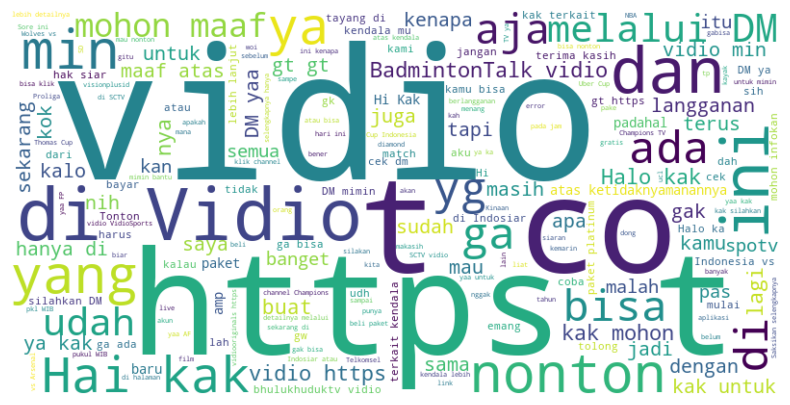

In [141]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menggabungkan semua teks dalam satu string
all_full_texts = ' '.join(eda_data['full_text'])

# Membuat wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_full_texts)

# Menampilkan wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Preprocessing

In [142]:
import copy

train_data_copy = copy.deepcopy(train_data)


## Case Folding

### Lowercase

In [143]:
def full_text_lowercase(full_text):
    full_text = full_text.lower()
    return full_text

In [144]:
%%time
train_data["full_text"] = train_data["full_text"].apply(full_text_lowercase)

CPU times: total: 0 ns
Wall time: 1 ms


In [145]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,@vidio kenapa match lavani vs PBS ga bisa diputar??? mau nonton ulang aksi Beik nih,@vidio kenapa match lavani vs pbs ga bisa diputar??? mau nonton ulang aksi beik nih
1,@vidio ga mau ga ngasih solusi jg.. solusinya itu re-upload match Proliga nya @LavaniForever kemarin TITIK,@vidio ga mau ga ngasih solusi jg.. solusinya itu re-upload match proliga nya @lavaniforever kemarin titik
2,@vidio nyiarin indo vs usbek gk??,@vidio nyiarin indo vs usbek gk??
3,@vidio Kecewa banget udah berbayar tapi gak bisa nonton tim uber main,@vidio kecewa banget udah berbayar tapi gak bisa nonton tim uber main
4,@vidio Ohhhh di court 4 ternyata ga ada kamera emang,@vidio ohhhh di court 4 ternyata ga ada kamera emang
5,@vidio Lah tau gitu mending saya langganan SPOTV aja‍️ Ini sampai final emang ga akan ditayangin apa gimana?,@vidio lah tau gitu mending saya langganan spotv aja‍️ ini sampai final emang ga akan ditayangin apa gimana?
6,@vidio udah min mohon dicek,@vidio udah min mohon dicek
7,@vidio saya udah langganan kenapa mau nonton gak bisa ya https://t.co/bFnHUcMLbh,@vidio saya udah langganan kenapa mau nonton gak bisa ya https://t.co/bfnhucmlbh
8,@vidio Endingnya kayak Bourne Ultimatum,@vidio endingnya kayak bourne ultimatum
9,@vidio min voli lavani vs sumsel babel gak bisa di tonton ulang yg tgl 28 kemarin,@vidio min voli lavani vs sumsel babel gak bisa di tonton ulang yg tgl 28 kemarin


In [146]:

display(HTML(comparison_df.tail(1).to_html()))

,Before,After
930,Aliza (Naura Ayu) masak buat Kinaan aja bahagia banget Sementara itu Zero (Teuku Rassya) ngapain lagi nih sampe bikin Kinaan (Fadi Alaydrus) kesel banget kayak gini? Nonton #SantriPilihanBunda ep 5 sekarang hanya di Vidio #SantriPilihanBundaSeries #VidioOriginals https://t.co/nxYciYMv8j,aliza (naura ayu) masak buat kinaan aja bahagia banget sementara itu zero (teuku rassya) ngapain lagi nih sampe bikin kinaan (fadi alaydrus) kesel banget kayak gini? nonton #santripilihanbunda ep 5 sekarang hanya di vidio #santripilihanbundaseries #vidiooriginals https://t.co/nxyciymv8j


In [147]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(full_text_lowercase)

CPU times: total: 0 ns
Wall time: 2 ms


## Cleansing

### Menghapus username

In [148]:
def full_text_delete_username(full_text):
    userPattern       = '@[^\s]+'
    # Ngehapus kata "username" 
    full_text = re.sub(userPattern, '', full_text)
    
    return full_text

In [149]:
%%time
train_data["full_text"] = train_data["full_text"].apply(full_text_delete_username)

CPU times: total: 0 ns
Wall time: 5.03 ms


In [150]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,@vidio kenapa match lavani vs pbs ga bisa diputar??? mau nonton ulang aksi beik nih,kenapa match lavani vs pbs ga bisa diputar??? mau nonton ulang aksi beik nih
1,@vidio ga mau ga ngasih solusi jg.. solusinya itu re-upload match proliga nya @lavaniforever kemarin titik,ga mau ga ngasih solusi jg.. solusinya itu re-upload match proliga nya kemarin titik
2,@vidio nyiarin indo vs usbek gk??,nyiarin indo vs usbek gk??
3,@vidio kecewa banget udah berbayar tapi gak bisa nonton tim uber main,kecewa banget udah berbayar tapi gak bisa nonton tim uber main
4,@vidio ohhhh di court 4 ternyata ga ada kamera emang,ohhhh di court 4 ternyata ga ada kamera emang
5,@vidio lah tau gitu mending saya langganan spotv aja‍️ ini sampai final emang ga akan ditayangin apa gimana?,lah tau gitu mending saya langganan spotv aja‍️ ini sampai final emang ga akan ditayangin apa gimana?
6,@vidio udah min mohon dicek,udah min mohon dicek
7,@vidio saya udah langganan kenapa mau nonton gak bisa ya https://t.co/bfnhucmlbh,saya udah langganan kenapa mau nonton gak bisa ya https://t.co/bfnhucmlbh
8,@vidio endingnya kayak bourne ultimatum,endingnya kayak bourne ultimatum
9,@vidio min voli lavani vs sumsel babel gak bisa di tonton ulang yg tgl 28 kemarin,min voli lavani vs sumsel babel gak bisa di tonton ulang yg tgl 28 kemarin


In [151]:

display(HTML(comparison_df.tail(1).to_html()))

,Before,After
930,aliza (naura ayu) masak buat kinaan aja bahagia banget sementara itu zero (teuku rassya) ngapain lagi nih sampe bikin kinaan (fadi alaydrus) kesel banget kayak gini? nonton #santripilihanbunda ep 5 sekarang hanya di vidio #santripilihanbundaseries #vidiooriginals https://t.co/nxyciymv8j,aliza (naura ayu) masak buat kinaan aja bahagia banget sementara itu zero (teuku rassya) ngapain lagi nih sampe bikin kinaan (fadi alaydrus) kesel banget kayak gini? nonton #santripilihanbunda ep 5 sekarang hanya di vidio #santripilihanbundaseries #vidiooriginals https://t.co/nxyciymv8j


In [152]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(full_text_delete_username)

CPU times: total: 0 ns
Wall time: 5.21 ms


### Menghapus url

In [153]:
def full_text_delete_url(full_text):
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|(www\.)[^ ]*|url)" #Pola ngehapus url
    full_text = re.sub(urlPattern, '', full_text)
    return full_text

In [154]:
%%time
train_data["full_text"] = train_data["full_text"].apply(full_text_delete_url)

CPU times: total: 0 ns
Wall time: 13.7 ms


In [155]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,kenapa match lavani vs pbs ga bisa diputar??? mau nonton ulang aksi beik nih,kenapa match lavani vs pbs ga bisa diputar??? mau nonton ulang aksi beik nih
1,ga mau ga ngasih solusi jg.. solusinya itu re-upload match proliga nya kemarin titik,ga mau ga ngasih solusi jg.. solusinya itu re-upload match proliga nya kemarin titik
2,nyiarin indo vs usbek gk??,nyiarin indo vs usbek gk??
3,kecewa banget udah berbayar tapi gak bisa nonton tim uber main,kecewa banget udah berbayar tapi gak bisa nonton tim uber main
4,ohhhh di court 4 ternyata ga ada kamera emang,ohhhh di court 4 ternyata ga ada kamera emang
5,lah tau gitu mending saya langganan spotv aja‍️ ini sampai final emang ga akan ditayangin apa gimana?,lah tau gitu mending saya langganan spotv aja‍️ ini sampai final emang ga akan ditayangin apa gimana?
6,udah min mohon dicek,udah min mohon dicek
7,saya udah langganan kenapa mau nonton gak bisa ya https://t.co/bfnhucmlbh,saya udah langganan kenapa mau nonton gak bisa ya
8,endingnya kayak bourne ultimatum,endingnya kayak bourne ultimatum
9,min voli lavani vs sumsel babel gak bisa di tonton ulang yg tgl 28 kemarin,min voli lavani vs sumsel babel gak bisa di tonton ulang yg tgl 28 kemarin


In [156]:

display(HTML(comparison_df.tail(1).to_html()))

,Before,After
930,aliza (naura ayu) masak buat kinaan aja bahagia banget sementara itu zero (teuku rassya) ngapain lagi nih sampe bikin kinaan (fadi alaydrus) kesel banget kayak gini? nonton #santripilihanbunda ep 5 sekarang hanya di vidio #santripilihanbundaseries #vidiooriginals https://t.co/nxyciymv8j,aliza (naura ayu) masak buat kinaan aja bahagia banget sementara itu zero (teuku rassya) ngapain lagi nih sampe bikin kinaan (fadi alaydrus) kesel banget kayak gini? nonton #santripilihanbunda ep 5 sekarang hanya di vidio #santripilihanbundaseries #vidiooriginals


In [157]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(full_text_delete_url)

CPU times: total: 0 ns
Wall time: 19 ms


### Menghapus kelebihan huruf

In [158]:
def full_text_delete_extra_letters(full_text):
    sequencePattern   = r'([A-Za-z])\1{2,}' #Pola ngehapus karakter yang punya kelebihan huruf
    seqReplacePattern = r'\1' #Pola ngereplace yang kelebihan huruf tiga kali
    full_text = re.sub(sequencePattern, seqReplacePattern, full_text)
    
    return full_text

In [159]:
%%time
train_data["full_text"] = train_data["full_text"].apply(full_text_delete_extra_letters)

CPU times: total: 0 ns
Wall time: 17.5 ms


In [160]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,kenapa match lavani vs pbs ga bisa diputar??? mau nonton ulang aksi beik nih,kenapa match lavani vs pbs ga bisa diputar??? mau nonton ulang aksi beik nih
1,ga mau ga ngasih solusi jg.. solusinya itu re-upload match proliga nya kemarin titik,ga mau ga ngasih solusi jg.. solusinya itu re-upload match proliga nya kemarin titik
2,nyiarin indo vs usbek gk??,nyiarin indo vs usbek gk??
3,kecewa banget udah berbayar tapi gak bisa nonton tim uber main,kecewa banget udah berbayar tapi gak bisa nonton tim uber main
4,ohhhh di court 4 ternyata ga ada kamera emang,oh di court 4 ternyata ga ada kamera emang
5,lah tau gitu mending saya langganan spotv aja‍️ ini sampai final emang ga akan ditayangin apa gimana?,lah tau gitu mending saya langganan spotv aja‍️ ini sampai final emang ga akan ditayangin apa gimana?
6,udah min mohon dicek,udah min mohon dicek
7,saya udah langganan kenapa mau nonton gak bisa ya,saya udah langganan kenapa mau nonton gak bisa ya
8,endingnya kayak bourne ultimatum,endingnya kayak bourne ultimatum
9,min voli lavani vs sumsel babel gak bisa di tonton ulang yg tgl 28 kemarin,min voli lavani vs sumsel babel gak bisa di tonton ulang yg tgl 28 kemarin


In [161]:

display(HTML(comparison_df.tail(1).to_html()))

,Before,After
930,aliza (naura ayu) masak buat kinaan aja bahagia banget sementara itu zero (teuku rassya) ngapain lagi nih sampe bikin kinaan (fadi alaydrus) kesel banget kayak gini? nonton #santripilihanbunda ep 5 sekarang hanya di vidio #santripilihanbundaseries #vidiooriginals,aliza (naura ayu) masak buat kinaan aja bahagia banget sementara itu zero (teuku rassya) ngapain lagi nih sampe bikin kinaan (fadi alaydrus) kesel banget kayak gini? nonton #santripilihanbunda ep 5 sekarang hanya di vidio #santripilihanbundaseries #vidiooriginals


In [162]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(full_text_delete_extra_letters)

CPU times: total: 0 ns
Wall time: 22 ms


### Menghapus Noise

In [163]:
def full_text_delete_noise(full_text):
        full_text = re.sub(r'(asslamu alaikum|assalamualaikum|asalamualaikum|assalamu\'alaikum|Assalamu alaikum|Assalamualaikum warahmatullahi wabarakatuh|ass wr\. wb\.|ass)', '', full_text)
        return full_text

In [164]:
%%time
train_data["full_text"] = train_data["full_text"].apply(full_text_delete_noise)

CPU times: total: 0 ns
Wall time: 9.89 ms


In [165]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})

pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,kenapa match lavani vs pbs ga bisa diputar??? mau nonton ulang aksi beik nih,kenapa match lavani vs pbs ga bisa diputar??? mau nonton ulang aksi beik nih
1,ga mau ga ngasih solusi jg.. solusinya itu re-upload match proliga nya kemarin titik,ga mau ga ngasih solusi jg.. solusinya itu re-upload match proliga nya kemarin titik
2,nyiarin indo vs usbek gk??,nyiarin indo vs usbek gk??
3,kecewa banget udah berbayar tapi gak bisa nonton tim uber main,kecewa banget udah berbayar tapi gak bisa nonton tim uber main
4,oh di court 4 ternyata ga ada kamera emang,oh di court 4 ternyata ga ada kamera emang
5,lah tau gitu mending saya langganan spotv aja‍️ ini sampai final emang ga akan ditayangin apa gimana?,lah tau gitu mending saya langganan spotv aja‍️ ini sampai final emang ga akan ditayangin apa gimana?
6,udah min mohon dicek,udah min mohon dicek
7,saya udah langganan kenapa mau nonton gak bisa ya,saya udah langganan kenapa mau nonton gak bisa ya
8,endingnya kayak bourne ultimatum,endingnya kayak bourne ultimatum
9,min voli lavani vs sumsel babel gak bisa di tonton ulang yg tgl 28 kemarin,min voli lavani vs sumsel babel gak bisa di tonton ulang yg tgl 28 kemarin


In [166]:

display(HTML(comparison_df.tail(1).to_html()))

,Before,After
930,aliza (naura ayu) masak buat kinaan aja bahagia banget sementara itu zero (teuku rassya) ngapain lagi nih sampe bikin kinaan (fadi alaydrus) kesel banget kayak gini? nonton #santripilihanbunda ep 5 sekarang hanya di vidio #santripilihanbundaseries #vidiooriginals,aliza (naura ayu) masak buat kinaan aja bahagia banget sementara itu zero (teuku rya) ngapain lagi nih sampe bikin kinaan (fadi alaydrus) kesel banget kayak gini? nonton #santripilihanbunda ep 5 sekarang hanya di vidio #santripilihanbundaseries #vidiooriginals


In [167]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(full_text_delete_noise)

CPU times: total: 15.6 ms
Wall time: 9.94 ms


### Menghapus new line dan new text

In [168]:
def full_text_delete_new_line_new_text(full_text):
    full_text = re.sub(r'\\[nt]', ' ', full_text)
    return full_text

In [169]:
%%time
train_data["full_text"] = train_data["full_text"].apply(full_text_delete_new_line_new_text)

CPU times: total: 0 ns
Wall time: 3.47 ms


In [170]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,kenapa match lavani vs pbs ga bisa diputar??? mau nonton ulang aksi beik nih,kenapa match lavani vs pbs ga bisa diputar??? mau nonton ulang aksi beik nih
1,ga mau ga ngasih solusi jg.. solusinya itu re-upload match proliga nya kemarin titik,ga mau ga ngasih solusi jg.. solusinya itu re-upload match proliga nya kemarin titik
2,nyiarin indo vs usbek gk??,nyiarin indo vs usbek gk??
3,kecewa banget udah berbayar tapi gak bisa nonton tim uber main,kecewa banget udah berbayar tapi gak bisa nonton tim uber main
4,oh di court 4 ternyata ga ada kamera emang,oh di court 4 ternyata ga ada kamera emang
5,lah tau gitu mending saya langganan spotv aja‍️ ini sampai final emang ga akan ditayangin apa gimana?,lah tau gitu mending saya langganan spotv aja‍️ ini sampai final emang ga akan ditayangin apa gimana?
6,udah min mohon dicek,udah min mohon dicek
7,saya udah langganan kenapa mau nonton gak bisa ya,saya udah langganan kenapa mau nonton gak bisa ya
8,endingnya kayak bourne ultimatum,endingnya kayak bourne ultimatum
9,min voli lavani vs sumsel babel gak bisa di tonton ulang yg tgl 28 kemarin,min voli lavani vs sumsel babel gak bisa di tonton ulang yg tgl 28 kemarin


In [171]:

display(HTML(comparison_df.tail(1).to_html()))

,Before,After
930,aliza (naura ayu) masak buat kinaan aja bahagia banget sementara itu zero (teuku rya) ngapain lagi nih sampe bikin kinaan (fadi alaydrus) kesel banget kayak gini? nonton #santripilihanbunda ep 5 sekarang hanya di vidio #santripilihanbundaseries #vidiooriginals,aliza (naura ayu) masak buat kinaan aja bahagia banget sementara itu zero (teuku rya) ngapain lagi nih sampe bikin kinaan (fadi alaydrus) kesel banget kayak gini? nonton #santripilihanbunda ep 5 sekarang hanya di vidio #santripilihanbundaseries #vidiooriginals


In [172]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(full_text_delete_new_line_new_text)

CPU times: total: 0 ns
Wall time: 4 ms


### Menghapus Hastag

In [173]:
def full_text_remove_hashtags(full_text):
    hashtag= r'#\w+'
    full_text = re.sub(hashtag, '', full_text)
    return full_text

In [174]:
%%time
train_data["full_text"] = train_data["full_text"].apply(full_text_remove_hashtags)

CPU times: total: 0 ns
Wall time: 4 ms


In [175]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})

pd.options.display.max_colwidth = 150

display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,kenapa match lavani vs pbs ga bisa diputar??? mau nonton ulang aksi beik nih,kenapa match lavani vs pbs ga bisa diputar??? mau nonton ulang aksi beik nih
1,ga mau ga ngasih solusi jg.. solusinya itu re-upload match proliga nya kemarin titik,ga mau ga ngasih solusi jg.. solusinya itu re-upload match proliga nya kemarin titik
2,nyiarin indo vs usbek gk??,nyiarin indo vs usbek gk??
3,kecewa banget udah berbayar tapi gak bisa nonton tim uber main,kecewa banget udah berbayar tapi gak bisa nonton tim uber main
4,oh di court 4 ternyata ga ada kamera emang,oh di court 4 ternyata ga ada kamera emang
5,lah tau gitu mending saya langganan spotv aja‍️ ini sampai final emang ga akan ditayangin apa gimana?,lah tau gitu mending saya langganan spotv aja‍️ ini sampai final emang ga akan ditayangin apa gimana?
6,udah min mohon dicek,udah min mohon dicek
7,saya udah langganan kenapa mau nonton gak bisa ya,saya udah langganan kenapa mau nonton gak bisa ya
8,endingnya kayak bourne ultimatum,endingnya kayak bourne ultimatum
9,min voli lavani vs sumsel babel gak bisa di tonton ulang yg tgl 28 kemarin,min voli lavani vs sumsel babel gak bisa di tonton ulang yg tgl 28 kemarin


In [176]:

display(HTML(comparison_df.tail(1).to_html()))

,Before,After
930,aliza (naura ayu) masak buat kinaan aja bahagia banget sementara itu zero (teuku rya) ngapain lagi nih sampe bikin kinaan (fadi alaydrus) kesel banget kayak gini? nonton #santripilihanbunda ep 5 sekarang hanya di vidio #santripilihanbundaseries #vidiooriginals,aliza (naura ayu) masak buat kinaan aja bahagia banget sementara itu zero (teuku rya) ngapain lagi nih sampe bikin kinaan (fadi alaydrus) kesel banget kayak gini? nonton ep 5 sekarang hanya di vidio


In [177]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(full_text_remove_hashtags)

CPU times: total: 0 ns
Wall time: 3.04 ms


### Menghapus angka

In [178]:
def full_text_delete_number(full_text):
    number = r'\d+' 
    full_text = re.sub(number, '', full_text)
    return full_text

In [179]:
%%time
train_data["full_text"] = train_data["full_text"].apply(full_text_delete_number)

CPU times: total: 0 ns
Wall time: 7 ms


In [180]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,kenapa match lavani vs pbs ga bisa diputar??? mau nonton ulang aksi beik nih,kenapa match lavani vs pbs ga bisa diputar??? mau nonton ulang aksi beik nih
1,ga mau ga ngasih solusi jg.. solusinya itu re-upload match proliga nya kemarin titik,ga mau ga ngasih solusi jg.. solusinya itu re-upload match proliga nya kemarin titik
2,nyiarin indo vs usbek gk??,nyiarin indo vs usbek gk??
3,kecewa banget udah berbayar tapi gak bisa nonton tim uber main,kecewa banget udah berbayar tapi gak bisa nonton tim uber main
4,oh di court 4 ternyata ga ada kamera emang,oh di court ternyata ga ada kamera emang
5,lah tau gitu mending saya langganan spotv aja‍️ ini sampai final emang ga akan ditayangin apa gimana?,lah tau gitu mending saya langganan spotv aja‍️ ini sampai final emang ga akan ditayangin apa gimana?
6,udah min mohon dicek,udah min mohon dicek
7,saya udah langganan kenapa mau nonton gak bisa ya,saya udah langganan kenapa mau nonton gak bisa ya
8,endingnya kayak bourne ultimatum,endingnya kayak bourne ultimatum
9,min voli lavani vs sumsel babel gak bisa di tonton ulang yg tgl 28 kemarin,min voli lavani vs sumsel babel gak bisa di tonton ulang yg tgl kemarin


In [181]:

display(HTML(comparison_df.tail(1).to_html()))

,Before,After
930,aliza (naura ayu) masak buat kinaan aja bahagia banget sementara itu zero (teuku rya) ngapain lagi nih sampe bikin kinaan (fadi alaydrus) kesel banget kayak gini? nonton ep 5 sekarang hanya di vidio,aliza (naura ayu) masak buat kinaan aja bahagia banget sementara itu zero (teuku rya) ngapain lagi nih sampe bikin kinaan (fadi alaydrus) kesel banget kayak gini? nonton ep sekarang hanya di vidio


In [182]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(full_text_delete_number)

CPU times: total: 0 ns
Wall time: 9.17 ms


### Menghapus tanda baca

In [183]:
def full_text_delete_punctuation(full_text):
    punctuationPattern = r'[^\w\s]' 
    full_text = re.sub(punctuationPattern, ' ', full_text)
    
    return full_text

In [184]:
%%time
train_data["full_text"] = train_data["full_text"].apply(full_text_delete_punctuation)

CPU times: total: 15.6 ms
Wall time: 8 ms


In [185]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,kenapa match lavani vs pbs ga bisa diputar??? mau nonton ulang aksi beik nih,kenapa match lavani vs pbs ga bisa diputar mau nonton ulang aksi beik nih
1,ga mau ga ngasih solusi jg.. solusinya itu re-upload match proliga nya kemarin titik,ga mau ga ngasih solusi jg solusinya itu re upload match proliga nya kemarin titik
2,nyiarin indo vs usbek gk??,nyiarin indo vs usbek gk
3,kecewa banget udah berbayar tapi gak bisa nonton tim uber main,kecewa banget udah berbayar tapi gak bisa nonton tim uber main
4,oh di court ternyata ga ada kamera emang,oh di court ternyata ga ada kamera emang
5,lah tau gitu mending saya langganan spotv aja‍️ ini sampai final emang ga akan ditayangin apa gimana?,lah tau gitu mending saya langganan spotv aja ini sampai final emang ga akan ditayangin apa gimana
6,udah min mohon dicek,udah min mohon dicek
7,saya udah langganan kenapa mau nonton gak bisa ya,saya udah langganan kenapa mau nonton gak bisa ya
8,endingnya kayak bourne ultimatum,endingnya kayak bourne ultimatum
9,min voli lavani vs sumsel babel gak bisa di tonton ulang yg tgl kemarin,min voli lavani vs sumsel babel gak bisa di tonton ulang yg tgl kemarin


In [186]:

display(HTML(comparison_df.tail(1).to_html()))

,Before,After
930,aliza (naura ayu) masak buat kinaan aja bahagia banget sementara itu zero (teuku rya) ngapain lagi nih sampe bikin kinaan (fadi alaydrus) kesel banget kayak gini? nonton ep sekarang hanya di vidio,aliza naura ayu masak buat kinaan aja bahagia banget sementara itu zero teuku rya ngapain lagi nih sampe bikin kinaan fadi alaydrus kesel banget kayak gini nonton ep sekarang hanya di vidio


In [187]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(full_text_delete_punctuation)

CPU times: total: 0 ns
Wall time: 9 ms


### Menghapus Extra Spasi

In [188]:
def full_text_delete_extra_space(full_text):
    full_text = re.sub(r"\s+", " ", full_text)
    full_text = re.sub(r"^\s+|\s+$", "", full_text)
    
    return full_text

In [189]:
%%time
train_data["full_text"] = train_data["full_text"].apply(full_text_delete_extra_space)

CPU times: total: 0 ns
Wall time: 26 ms


In [190]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,kenapa match lavani vs pbs ga bisa diputar mau nonton ulang aksi beik nih,kenapa match lavani vs pbs ga bisa diputar mau nonton ulang aksi beik nih
1,ga mau ga ngasih solusi jg solusinya itu re upload match proliga nya kemarin titik,ga mau ga ngasih solusi jg solusinya itu re upload match proliga nya kemarin titik
2,nyiarin indo vs usbek gk,nyiarin indo vs usbek gk
3,kecewa banget udah berbayar tapi gak bisa nonton tim uber main,kecewa banget udah berbayar tapi gak bisa nonton tim uber main
4,oh di court ternyata ga ada kamera emang,oh di court ternyata ga ada kamera emang
5,lah tau gitu mending saya langganan spotv aja ini sampai final emang ga akan ditayangin apa gimana,lah tau gitu mending saya langganan spotv aja ini sampai final emang ga akan ditayangin apa gimana
6,udah min mohon dicek,udah min mohon dicek
7,saya udah langganan kenapa mau nonton gak bisa ya,saya udah langganan kenapa mau nonton gak bisa ya
8,endingnya kayak bourne ultimatum,endingnya kayak bourne ultimatum
9,min voli lavani vs sumsel babel gak bisa di tonton ulang yg tgl kemarin,min voli lavani vs sumsel babel gak bisa di tonton ulang yg tgl kemarin


In [191]:

display(HTML(comparison_df.tail(1).to_html()))

,Before,After
930,aliza naura ayu masak buat kinaan aja bahagia banget sementara itu zero teuku rya ngapain lagi nih sampe bikin kinaan fadi alaydrus kesel banget kayak gini nonton ep sekarang hanya di vidio,aliza naura ayu masak buat kinaan aja bahagia banget sementara itu zero teuku rya ngapain lagi nih sampe bikin kinaan fadi alaydrus kesel banget kayak gini nonton ep sekarang hanya di vidio


In [192]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(full_text_delete_extra_space)

CPU times: total: 15.6 ms
Wall time: 31.9 ms


## Tokenization

In [193]:
from nltk.tokenize import word_tokenize 

In [194]:
def full_text_tokenize(full_text):
    return word_tokenize(full_text)

In [195]:
%%time
train_data["full_text"] = train_data["full_text"].apply(full_text_tokenize)

CPU times: total: 109 ms
Wall time: 299 ms


In [196]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,kenapa match lavani vs pbs ga bisa diputar mau nonton ulang aksi beik nih,"[kenapa, match, lavani, vs, pbs, ga, bisa, diputar, mau, nonton, ulang, aksi, beik, nih]"
1,ga mau ga ngasih solusi jg solusinya itu re upload match proliga nya kemarin titik,"[ga, mau, ga, ngasih, solusi, jg, solusinya, itu, re, upload, match, proliga, nya, kemarin, titik]"
2,nyiarin indo vs usbek gk,"[nyiarin, indo, vs, usbek, gk]"
3,kecewa banget udah berbayar tapi gak bisa nonton tim uber main,"[kecewa, banget, udah, berbayar, tapi, gak, bisa, nonton, tim, uber, main]"
4,oh di court ternyata ga ada kamera emang,"[oh, di, court, ternyata, ga, ada, kamera, emang]"
5,lah tau gitu mending saya langganan spotv aja ini sampai final emang ga akan ditayangin apa gimana,"[lah, tau, gitu, mending, saya, langganan, spotv, aja, ini, sampai, final, emang, ga, akan, ditayangin, apa, gimana]"
6,udah min mohon dicek,"[udah, min, mohon, dicek]"
7,saya udah langganan kenapa mau nonton gak bisa ya,"[saya, udah, langganan, kenapa, mau, nonton, gak, bisa, ya]"
8,endingnya kayak bourne ultimatum,"[endingnya, kayak, bourne, ultimatum]"
9,min voli lavani vs sumsel babel gak bisa di tonton ulang yg tgl kemarin,"[min, voli, lavani, vs, sumsel, babel, gak, bisa, di, tonton, ulang, yg, tgl, kemarin]"


In [197]:

display(HTML(comparison_df.tail(1).to_html()))

,Before,After
930,aliza naura ayu masak buat kinaan aja bahagia banget sementara itu zero teuku rya ngapain lagi nih sampe bikin kinaan fadi alaydrus kesel banget kayak gini nonton ep sekarang hanya di vidio,"[aliza, naura, ayu, masak, buat, kinaan, aja, bahagia, banget, sementara, itu, zero, teuku, rya, ngapain, lagi, nih, sampe, bikin, kinaan, fadi, alaydrus, kesel, banget, kayak, gini, nonton, ep, sekarang, hanya, di, vidio]"


In [198]:
%%time
train_data_copy["full_text"] = train_data_copy["full_text"].apply(full_text_tokenize)

CPU times: total: 109 ms
Wall time: 286 ms


## Normalization

### Import Kamus

In [199]:
kamus_singkatan = pd.read_csv("../Dataset/kamus_singkatan.csv",names=["kata_gaul","kata_asal"],delimiter=";")
kamus_singkatan

,kata_gaul,kata_asal
0,aamiin,amin
1,adek,adik
2,adlh,adalah
3,aer,air
4,aiskrim,es krim
...,...,...
1304,yoi,iya
1305,yup,ya
1306,yups,ya
1307,yupz,ya


In [200]:
def create_kamus():
      kamus = {}
      for i in range(len(kamus_singkatan)):
          kamus[kamus_singkatan["kata_gaul"][i]]=kamus_singkatan["kata_asal"][i].lower().strip()
      return kamus

In [201]:
kamus = create_kamus()
kamus

{'aamiin': 'amin',
 'adek': 'adik',
 'adlh': 'adalah',
 'aer': 'air',
 'aiskrim': 'es krim',
 'aj': 'saja',
 'aja': 'saja',
 'ajah': 'saja',
 'ajalah': 'saja',
 'aje': 'saja',
 'ajh': 'saja',
 'ajj': 'saja',
 'aku': 'saya',
 'ak': 'saya',
 'akoh': 'saya',
 'akutu': 'saya',
 'aq': 'saya',
 'alesan': 'alasan',
 'ama': 'sama',
 'amaca': 'ah masa',
 'amuh': 'kamu',
 'ancur': 'hancur',
 'ane': 'saya',
 'anget': 'hangat',
 'anjeng': 'anjing',
 'ank': 'anak',
 'apah': 'apa',
 'aph': 'apa',
 'apo': 'apa',
 'apose': 'apa',
 'apz': 'apa',
 'artine': 'artinya',
 'asek': 'asik',
 'ati2': 'hati-hati',
 'atit': 'sakit',
 'atu': 'satu',
 'atw': 'atau',
 'ayang': 'sayang',
 'ayuk': 'ayo',
 'babang': 'abang',
 'bae': 'baik',
 'bais': 'habis',
 'bakalan': 'akan',
 'bales': 'balas',
 'bandingin': 'bandingkan',
 'banget': 'sekali',
 'bangett': 'sangat',
 'banyakin': 'perbanyak',
 'barengan': 'bersamaan',
 'baryaw': 'sabar ya',
 'baso': 'bakso',
 'bay': 'selamat tinggal',
 'bbrp': 'beberapa',
 'bc': 'baca'

In [202]:
def full_text_replace_contractions(full_text):
    pattern = re.compile(r'\b(' + '|'.join(re.escape(contraction) for contraction in kamus.keys()) + r')\b')
    full_text = pattern.sub(lambda x: kamus[x.group()], full_text)
    return full_text

In [203]:
%%time
for i in range(0,len(train_data)):
    himpunan_kata=[]
    for tokenize_full_text in train_data["full_text"][i]:
        tokenize_full_text = full_text_replace_contractions(tokenize_full_text)
        himpunan_kata.append(tokenize_full_text)
    train_data["full_text"][i]=himpunan_kata
    i+1

CPU times: total: 14.8 s
Wall time: 25.1 s


In [204]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"[kenapa, match, lavani, vs, pbs, ga, bisa, diputar, mau, nonton, ulang, aksi, beik, nih]","[kenapa, match, lavani, vs, pbs, tidak, bisa, diputar, mau, nonton, ulang, aksi, beik, nih]"
1,"[ga, mau, ga, ngasih, solusi, jg, solusinya, itu, re, upload, match, proliga, nya, kemarin, titik]","[tidak, mau, tidak, kasih, solusi, juga, solusinya, itu, re, upload, match, proliga, nya, kemarin, titik]"
2,"[nyiarin, indo, vs, usbek, gk]","[nyiarin, indo, vs, usbek, tidak]"
3,"[kecewa, banget, udah, berbayar, tapi, gak, bisa, nonton, tim, uber, main]","[kecewa, sekali, sudah, berbayar, tapi, tidak, bisa, nonton, tim, uber, main]"
4,"[oh, di, court, ternyata, ga, ada, kamera, emang]","[oh, di, court, ternyata, tidak, ada, kamera, memang]"
5,"[lah, tau, gitu, mending, saya, langganan, spotv, aja, ini, sampai, final, emang, ga, akan, ditayangin, apa, gimana]","[lah, tahu, begitu, mending, saya, langganan, spotv, saja, ini, sampai, final, memang, tidak, akan, ditayangin, apa, gimana]"
6,"[udah, min, mohon, dicek]","[sudah, min, mohon, dicek]"
7,"[saya, udah, langganan, kenapa, mau, nonton, gak, bisa, ya]","[saya, sudah, langganan, kenapa, mau, nonton, tidak, bisa, ya]"
8,"[endingnya, kayak, bourne, ultimatum]","[endingnya, mirip, bourne, ultimatum]"
9,"[min, voli, lavani, vs, sumsel, babel, gak, bisa, di, tonton, ulang, yg, tgl, kemarin]","[min, voli, lavani, vs, sumsel, babel, tidak, bisa, di, tonton, ulang, yang, tanggal, kemarin]"


In [205]:

display(HTML(comparison_df.tail(1).to_html()))

,Before,After
930,"[aliza, naura, ayu, masak, buat, kinaan, aja, bahagia, banget, sementara, itu, zero, teuku, rya, ngapain, lagi, nih, sampe, bikin, kinaan, fadi, alaydrus, kesel, banget, kayak, gini, nonton, ep, sekarang, hanya, di, vidio]","[aliza, naura, ayu, masak, buat, kinaan, saja, bahagia, sekali, sementara, itu, zero, teuku, rya, ngapain, lagi, nih, sampai, bikin, kinaan, fadi, alaydrus, kesal, sekali, mirip, gini, nonton, ep, sekarang, hanya, di, vidio]"


In [206]:
%%time
for i in range(0,len(train_data_copy)):
    himpunan_kata=[]
    for tokenize_full_text in train_data_copy["full_text"][i]:
        tokenize_full_text = full_text_replace_contractions(tokenize_full_text)
        himpunan_kata.append(tokenize_full_text)
    train_data_copy["full_text"][i]=himpunan_kata
    i+1

CPU times: total: 16 s
Wall time: 24.9 s


### Stemming

In [207]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()

In [208]:
def tweet_stemming(tweet):
    # Check if the input is a list
    if isinstance(tweet, list):
        stemmed_tweets = []
        # Iterate through each tweet in the list
        for t in tweet:
            # Create a stemmer object
            stemmer = factory.create_stemmer()
            # Stem the tweet and append to the list of stemmed tweets
            stemmed_tweets.append(stemmer.stem(t))
        # Return the list of stemmed tweets
        return stemmed_tweets
    else:
        # If the input is not a list, create a stemmer object
        stemmer = factory.create_stemmer()
        # Stem the single tweet and return
        return stemmer.stem(tweet)

In [209]:
train_data["full_text"] = train_data["full_text"].apply(tweet_stemming)

In [210]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"[kenapa, match, lavani, vs, pbs, tidak, bisa, diputar, mau, nonton, ulang, aksi, beik, nih]","[kenapa, match, lavani, vs, pbs, tidak, bisa, putar, mau, nonton, ulang, aksi, beik, nih]"
1,"[tidak, mau, tidak, kasih, solusi, juga, solusinya, itu, re, upload, match, proliga, nya, kemarin, titik]","[tidak, mau, tidak, kasih, solusi, juga, solusi, itu, re, upload, match, proliga, nya, kemarin, titik]"
2,"[nyiarin, indo, vs, usbek, tidak]","[nyiarin, indo, vs, usbek, tidak]"
3,"[kecewa, sekali, sudah, berbayar, tapi, tidak, bisa, nonton, tim, uber, main]","[kecewa, sekali, sudah, bayar, tapi, tidak, bisa, nonton, tim, uber, main]"
4,"[oh, di, court, ternyata, tidak, ada, kamera, memang]","[oh, di, court, nyata, tidak, ada, kamera, memang]"
5,"[lah, tahu, begitu, mending, saya, langganan, spotv, saja, ini, sampai, final, memang, tidak, akan, ditayangin, apa, gimana]","[lah, tahu, begitu, mending, saya, langgan, spotv, saja, ini, sampai, final, memang, tidak, akan, ditayangin, apa, gimana]"
6,"[sudah, min, mohon, dicek]","[sudah, min, mohon, cek]"
7,"[saya, sudah, langganan, kenapa, mau, nonton, tidak, bisa, ya]","[saya, sudah, langgan, kenapa, mau, nonton, tidak, bisa, ya]"
8,"[endingnya, mirip, bourne, ultimatum]","[endingnya, mirip, bourne, ultimatum]"
9,"[min, voli, lavani, vs, sumsel, babel, tidak, bisa, di, tonton, ulang, yang, tanggal, kemarin]","[min, voli, lavani, vs, sumsel, babel, tidak, bisa, di, tonton, ulang, yang, tanggal, kemarin]"


In [211]:

display(HTML(comparison_df.tail(1).to_html()))

,Before,After
930,"[aliza, naura, ayu, masak, buat, kinaan, saja, bahagia, sekali, sementara, itu, zero, teuku, rya, ngapain, lagi, nih, sampai, bikin, kinaan, fadi, alaydrus, kesal, sekali, mirip, gini, nonton, ep, sekarang, hanya, di, vidio]","[aliza, naura, ayu, masak, buat, kina, saja, bahagia, sekali, sementara, itu, zero, teuku, rya, ngapain, lagi, nih, sampai, bikin, kina, fadi, alaydrus, kesal, sekali, mirip, gin, nonton, ep, sekarang, hanya, di, vidio]"


In [212]:
train_data_copy["full_text"] = train_data_copy["full_text"].apply(tweet_stemming)

## Saving Preposessing

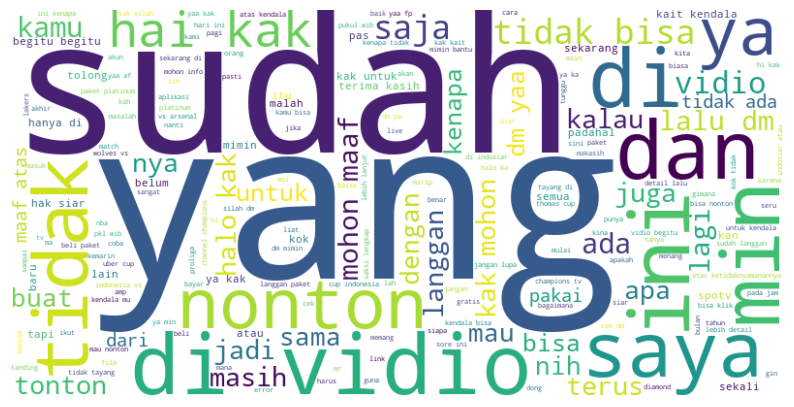

In [213]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert lists of full_texts into a single string
all_full_texts = ' '.join([full_text for sublist in train_data['full_text'] for full_text in sublist])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_full_texts)

# Display the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [214]:
comparison_df = pd.DataFrame({
    'Before ': eda_data['full_text'],
    'After ': train_data['full_text']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,@vidio kenapa match lavani vs PBS ga bisa diputar??? mau nonton ulang aksi Beik nih,"[kenapa, match, lavani, vs, pbs, tidak, bisa, putar, mau, nonton, ulang, aksi, beik, nih]"
1,@vidio ga mau ga ngasih solusi jg.. solusinya itu re-upload match Proliga nya @LavaniForever kemarin TITIK,"[tidak, mau, tidak, kasih, solusi, juga, solusi, itu, re, upload, match, proliga, nya, kemarin, titik]"
2,@vidio nyiarin indo vs usbek gk??,"[nyiarin, indo, vs, usbek, tidak]"
3,@vidio Kecewa banget udah berbayar tapi gak bisa nonton tim uber main,"[kecewa, sekali, sudah, bayar, tapi, tidak, bisa, nonton, tim, uber, main]"
4,@vidio Ohhhh di court 4 ternyata ga ada kamera emang,"[oh, di, court, nyata, tidak, ada, kamera, memang]"
5,@vidio Lah tau gitu mending saya langganan SPOTV aja‍️ Ini sampai final emang ga akan ditayangin apa gimana?,"[lah, tahu, begitu, mending, saya, langgan, spotv, saja, ini, sampai, final, memang, tidak, akan, ditayangin, apa, gimana]"
6,@vidio udah min mohon dicek,"[sudah, min, mohon, cek]"
7,@vidio saya udah langganan kenapa mau nonton gak bisa ya https://t.co/bFnHUcMLbh,"[saya, sudah, langgan, kenapa, mau, nonton, tidak, bisa, ya]"
8,@vidio Endingnya kayak Bourne Ultimatum,"[endingnya, mirip, bourne, ultimatum]"
9,@vidio min voli lavani vs sumsel babel gak bisa di tonton ulang yg tgl 28 kemarin,"[min, voli, lavani, vs, sumsel, babel, tidak, bisa, di, tonton, ulang, yang, tanggal, kemarin]"


In [215]:

display(HTML(comparison_df.tail(1).to_html()))

,Before,After
930,Aliza (Naura Ayu) masak buat Kinaan aja bahagia banget Sementara itu Zero (Teuku Rassya) ngapain lagi nih sampe bikin Kinaan (Fadi Alaydrus) kesel banget kayak gini? Nonton #SantriPilihanBunda ep 5 sekarang hanya di Vidio #SantriPilihanBundaSeries #VidioOriginals https://t.co/nxYciYMv8j,"[aliza, naura, ayu, masak, buat, kina, saja, bahagia, sekali, sementara, itu, zero, teuku, rya, ngapain, lagi, nih, sampai, bikin, kina, fadi, alaydrus, kesal, sekali, mirip, gin, nonton, ep, sekarang, hanya, di, vidio]"


In [216]:
train_data.to_csv("Dataset/Testing/Clean_testing_data_full.csv")

OSError: Cannot save file into a non-existent directory: 'Dataset\Testing'